# EXERCISE 1 - Deep Learning Class 2020.1
**Professor** : Tiago Ugolino Maritan

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jpvt/Deep_Learning/blob/main/Assignment_1/Exercise_4/Exercise_4.ipynb)

# Exercício 5

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal:
x(n) = sen(n + sen²(n))
mostrando para cada caso os erros de predição.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
from data_generator import generate_data, f

In [17]:
k_steps = 10
step_size = 0.1
X, y = generate_data((0, 40), k_steps, step_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train = np.array(X_train)
X_train.shape

(28, 100)

In [19]:
X_test = np.array(X_test)
X_test.shape

(12, 100)

In [20]:
y_train = np.array(y_train)
y_train.shape

(28, 30)

In [21]:
y_test = np.array(y_test)
y_test.shape

(12, 30)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(int(k_steps * 1/step_size), input_dim=int(k_steps * 1/step_size), kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(int(3 * 1/step_size), activation = 'linear')
    ])

In [23]:
def keras_r2_score(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square( y_true-y_pred ))
    SS_tot = keras.backend.sum(keras.backend.square( y_true - keras.backend.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + keras.backend.epsilon()) )

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=[keras_r2_score])
history = model.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test))

=========] - 0s 13ms/step - loss: 0.0013 - keras_r2_score: 0.9957 - val_loss: 0.0026 - val_keras_r2_score: 0.9919
Epoch 76/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0013 - keras_r2_score: 0.9959 - val_loss: 0.0025 - val_keras_r2_score: 0.9921
Epoch 77/200
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - keras_r2_score: 0.9960 - val_loss: 0.0024 - val_keras_r2_score: 0.9923
Epoch 78/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0012 - keras_r2_score: 0.9961 - val_loss: 0.0024 - val_keras_r2_score: 0.9925
Epoch 79/200
1/1 [==============================] - 0s 17ms/step - loss: 0.0012 - keras_r2_score: 0.9963 - val_loss: 0.0023 - val_keras_r2_score: 0.9927
Epoch 80/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - keras_r2_score: 0.9964 - val_loss: 0.0022 - val_keras_r2_score: 0.9929
Epoch 81/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - keras_r2_score: 0.9965 - val_loss: 0.00

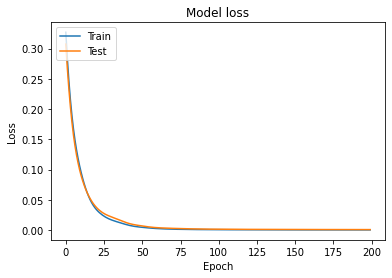

In [25]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

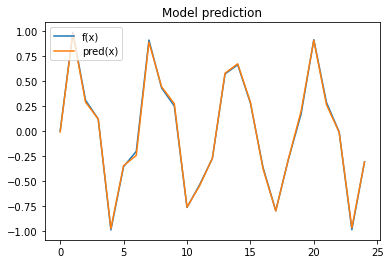

In [29]:
results = {'actual':[], 'predicted':[]}
for i in range(len(X[:25])):
    predicted = model.predict(np.array([X[i]]))
    results['actual'].append(y[i][0])
    results['predicted'].append(predicted[0][0])

plt.plot(results['actual']) 
plt.plot(results['predicted']) 
plt.title('Model prediction') 
plt.legend(['f(x)', 'pred(x)'], loc='upper left') 
plt.show()